#### import model

In [79]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### generate and split data

In [80]:
df = pd.read_csv('./archive/Ice_cream selling data.csv')
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


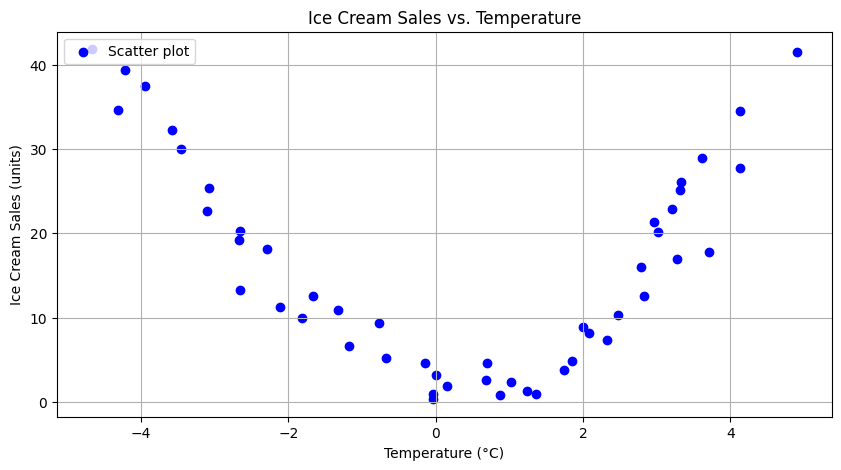

In [81]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(df['Temperature (°C)'], df['Ice Cream Sales (units)'], c='b', label='Scatter plot')
ax.set_title('Ice Cream Sales vs. Temperature')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Ice Cream Sales (units)')
ax.legend(loc='upper left')
plt.grid()
plt.show()



#### Split data

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df[['Temperature (°C)']], df[['Ice Cream Sales (units)']], test_size=0.2, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#### scale data

In [83]:
x_train_scaler = StandardScaler()
y_test_scaler = StandardScaler()
X_train_scaled = x_train_scaler.fit_transform(X_train)
X_test_scaled = x_train_scaler.transform(X_test)

#### Test Polynomial Feature

In [84]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [85]:
max_iter = 1000
model = SGDRegressor(max_iter=max_iter)
mse_history = []
for i in range(max_iter):
    model.partial_fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_history.append(mse)

coef = model.coef_
intercept = model.intercept_
print(f'Coefficients: {coef}')
print(f'Intercept: {intercept}')


Coefficients: [ 1.38058467 -1.91317189 14.36308214]
Intercept: [1.38661274]


In [96]:
import numpy as np

# Example array
arr = np.array([10, 8, 6, 7, 3])
print()

# Check if the array always decreases
is_decreasing = np.all(arr[1:] < arr[:-1])

print("Is the array always decreasing?", is_decreasing)


[8 6 7 3]
[10  8  6  7]
Is the array always decreasing? [ True  True False  True]


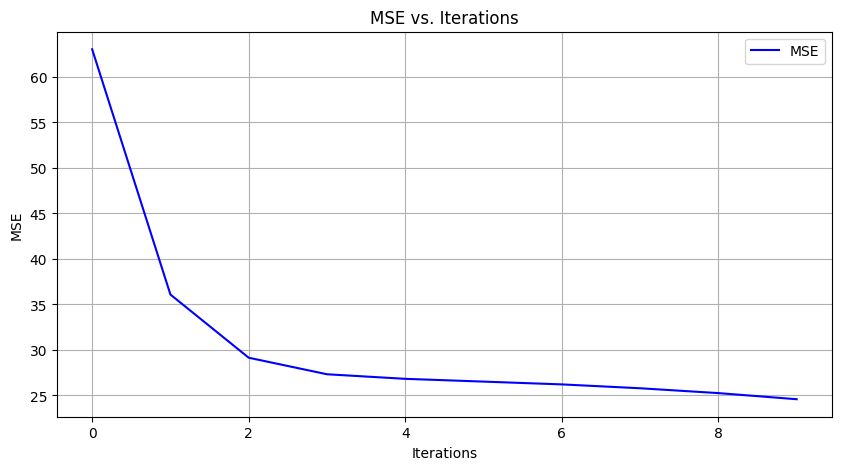

In [90]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
start, end = 10, 
ax.plot(range(start, end), mse_history[start:end], c='b', label='MSE')
ax.set_title('MSE vs. Iterations')
ax.set_xlabel('Iterations')
ax.set_ylabel('MSE')
ax.legend(loc='upper right')
plt.grid()
plt.show()

d:\hello_python\test_one\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


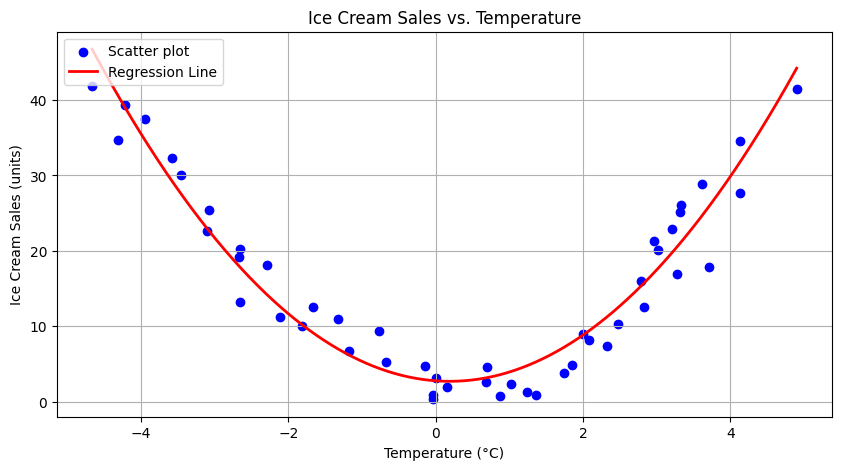

In [97]:
temperature = np.linspace(min(df['Temperature (°C)']), max(df['Temperature (°C)']), 500)
temperature_scaled = x_train_scaler.transform(temperature.reshape(-1, 1))
temperature_poly = poly.transform(temperature_scaled)
predicted_sales = model.predict(temperature_poly)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

# Scatter plot of actual data
ax.scatter(df['Temperature (°C)'], df['Ice Cream Sales (units)'], c='b', label='Scatter plot')
ax.plot(temperature, predicted_sales, color='red', label='Regression Line', linewidth=2)

# Labels, title, and legend
ax.set_title('Ice Cream Sales vs. Temperature')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Ice Cream Sales (units)')
ax.legend(loc='upper left')

# Grid and show
plt.grid()
plt.show()